In [1]:
import sys
sys.path.append('..')

In [3]:
from sklearn.mixture import GaussianMixture

import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# loading the sameple datasets into DataFrames
data_1 = pd.read_csv("../data/1_space_cluster_samples.csv")
data_3 = pd.read_csv("../data/3_space_cluster_samples.csv")
data_5 = pd.read_csv("../data/5_space_cluster_samples.csv")
data_7 = pd.read_csv("../data/7_space_cluster_samples.csv")

# pulling the data that will be used to train the model out of the datasets and storing them to individual DataFrames
X_1 = data_1[[str(x) for x in range(1, 10)]]
X_3 = data_3[[str(x) for x in range(1, 10)]]
X_5 = data_5[[str(x) for x in range(1, 10)]]
X_7 = data_7[[str(x) for x in range(1, 10)]]

# putting the training data into a list so we can iteratively test models
X = [X_1, X_3, X_5, X_7]

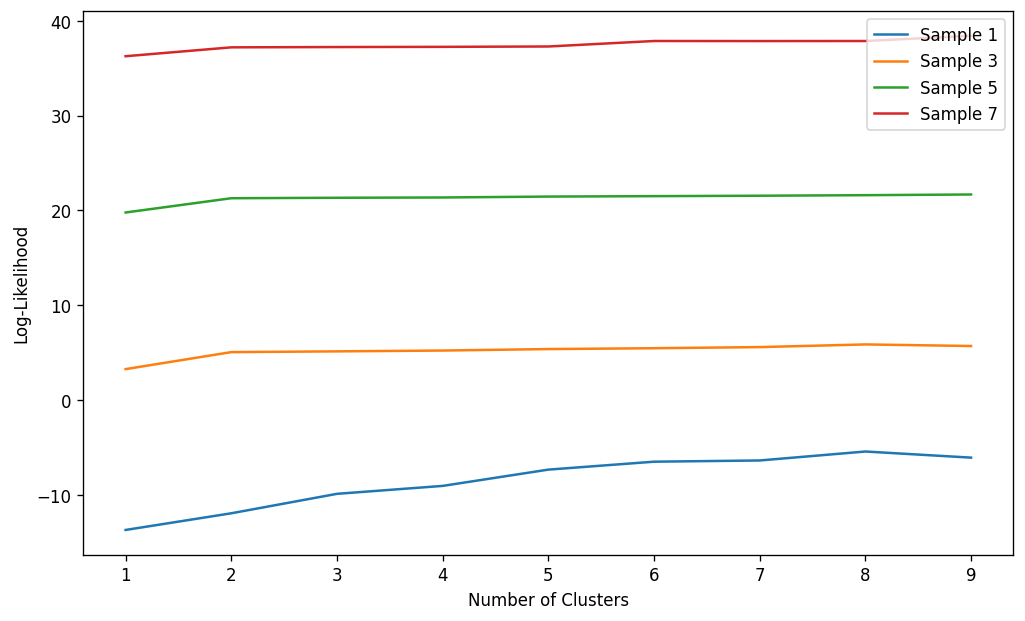

In [15]:
# initializing our plot
plt.figure(figsize=(10, 6), dpi=120)

# iteratively building models to identify an 'elbow' in the chart so that we may more easily identify the appropriate number of clusters
for i, df in enumerate(X):
    ll = dict()
    for k in range(1, 10):
        gmm = GaussianMixture(n_components=k, max_iter=2500).fit(df)
        ll[k] = gmm.score(df) # log-likelihood of the model
    plt.plot(list(ll.keys()), list(ll.values()), label=f"Sample {(2 * i) + 1}")

plt.xlabel("Number of Clusters")
plt.ylabel("Log-Likelihood")
plt.legend(loc="upper right")
plt.show()

We can see a trend with three of our of sample data sets where an elbow appears at n=2 components.

In [20]:
# toying around to see what probabilities it assigns to a similar random dataset
# the results are very binary, the model seems very certain
gauss = GaussianMixture(n_components=2)
gauss.fit(X_5)
gdf = pd.DataFrame(gauss.predict_proba(X_3))
gdf

,0,1
0,1.382789e-66,1.000000e+00
1,1.006563e-64,1.000000e+00
2,5.949846e-84,1.000000e+00
3,1.000000e+00,6.544374e-58
4,1.000000e+00,5.009760e-67
...,...,...
295,4.975070e-99,1.000000e+00
296,1.000000e+00,3.781460e-55
297,8.685845e-66,1.000000e+00
298,1.901994e-73,1.000000e+00
